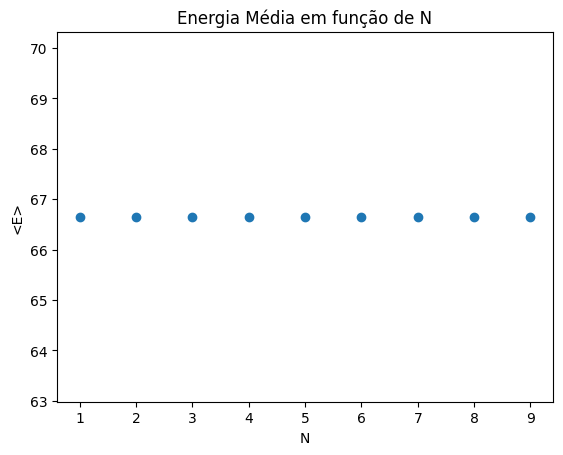

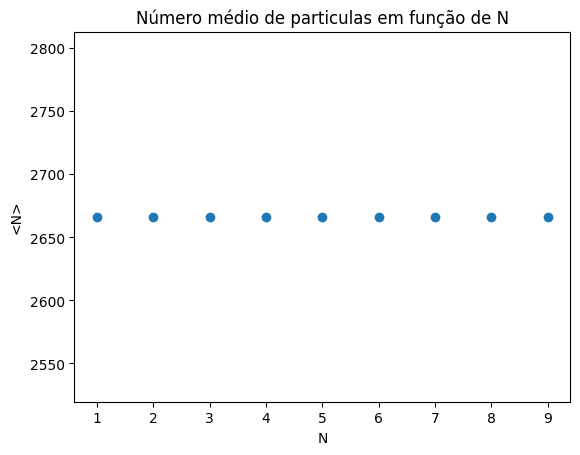

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


# parâmetros
b_value = 0.025 #1/kbt --> eV
r_value = 0.025 # energia necessária \epsolon
n_c_value = 0.2 #capacidade suporte
mu_value = 0.01 # potencial quimico


b, r, n_c, N = sp.symbols('b r n_c N') 

n_j, mu = sp.symbols('n_j mu', integer=True) 


# Defina as expressões para a função de partição e a energia média
grand_partition_function = (sp.exp(b*r*n_c))/(1- sp.exp(-b*(r - mu)))


mean_energy= -sp.diff(sp.log(grand_partition_function), b) + (mu / b) * sp.diff(sp.log(grand_partition_function), mu)
mean_particles = (1/b)* (sp.diff(sp.log(grand_partition_function), mu)) #verificar se está certo!!

# Converta para funções numéricas para plotagem
mean_energy_func = sp.lambdify(( b, r, n_c, mu), mean_energy, 'numpy')
mean_number_func = sp.lambdify(( b, r, n_c, mu), mean_particles, 'numpy')

# Calcule os valores da energia média para os valores de N
N_values = np.arange(1, 10)
mean_energy_values = [mean_energy_func( b_value, r_value, n_c_value, mu_value) for N_val in N_values]

mean_particles_values = [mean_number_func( b_value, r_value, n_c_value, mu_value) for N_val in N_values] 

# Plote o gráfico
plt.plot(N_values, mean_energy_values, 'o')
plt.xlabel('N')
plt.ylabel('<E>')
plt.title('Energia Média em função de N')
plt.show()


plt.plot(N_values, mean_particles_values, 'o')
plt.xlabel('N')
plt.ylabel('<N>')
plt.title('Número médio de particulas em função de N')
plt.show()


In [18]:

# Define the range of r_values and mu_values
r_values = np.linspace(0, 1, 100)  # Adjust the range and number of points as needed
mu_values = np.linspace(0, 1, 100)  # Adjust the range and number of points as needed

# Initialize an array to store the number of molecules
num_molecules = np.zeros((len(r_values), len(mu_values)))

# Calculate the number of molecules for each combination of r_value and mu_value
for i, r_val in enumerate(r_values):
    for j, mu_val in enumerate(mu_values):
        grand_partition_value = (np.exp(b_value *r_val*n_c_value))/(1 - np.exp(-b_value*(r_val - mu_val)))
        num_molecules[i, j] = (1/b_value) * (np.diff(np.log(grand_partition_value), mu_val))

# Create the heatmap
plt.imshow(num_molecules, extent=[min(mu_values), max(mu_values), min(r_values), max(r_values)], aspect='auto', origin='lower')
plt.colorbar(label='<N> (Number of molecules)')

# Set labels and title
plt.xlabel('mu')
plt.ylabel('r')
plt.title('Number of Molecules Heatmap')

# Show the plot
plt.show()

C:\Users\paola220041\AppData\Local\Temp\ipykernel_23980\2777566196.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  grand_partition_value = (np.exp(b_value *r_val*n_c_value))/(1 - np.exp(-b_value*(r_val - mu_val)))
C:\Users\paola220041\AppData\Local\Temp\ipykernel_23980\2777566196.py:12: RuntimeWarning: invalid value encountered in log
  num_molecules[i, j] = (1/b_value) * (np.diff(np.log(grand_partition_value), mu_val))


ValueError: diff requires input that is at least one dimensional